In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman')

In [5]:
L=480e-6
H=100e-6
Tref=773
rhof=4.4908
x_O2=0.22
hr=3.885e5 #J/mol
Mair=28.88
ladalf=0.055888
DO2=7.63596E-06
theoryCombustionTemp=1.2515

## Numerical Combustion Temperature variation with time

## Read DBS

In [3]:
fieldminMaxFile="./fieldMinMax.dat"
with open(fieldminMaxFile,"r") as fp:
    comment=fp.readline()
    header=fp.readline()
header=header[1:-1].split()
indexs_processor=[]
for i,name in enumerate(header):
    if header[i]=="processor":
        indexs_processor.append(i)
indexs_processor.reverse()  

data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
data=data.drop(indexs_processor,axis=1)
data.rename(columns=lambda x:header[x],inplace=True)
data.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
1,0.000003,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
2,0.000004,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
3,0.000006,T,772.9978,(4.350000e-05 4.450000e-05 5.000000e-07),773.0022,(2.350000e-05 8.450000e-05 5.000000e-07)
4,0.000009,T,772.9976,(6.550000e-05 6.350000e-05 5.000000e-07),773.0077,(2.350000e-05 8.450000e-05 5.000000e-07)


### Read LB

In [8]:
data_lb=pd.read_csv("./combustionTemperatureLB.dat",sep="\t",header=None,names=["Time","Temp"])
data_lb.head()

,Time,Temp
0,0.01,1.073720
1,0.02,1.223787
2,0.03,1.245980
3,0.04,1.230430
4,0.05,1.224149


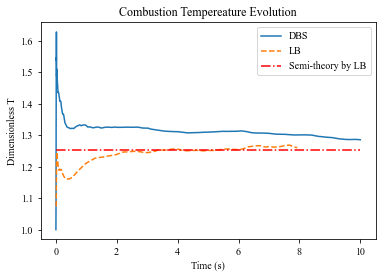

In [18]:
fig, ax = plt.subplots()
ax.plot(data["Time"],data["max"]/Tref,lineStyle="-",label="DBS")
ax.plot(data_lb["Time"],data_lb["Temp"],lineStyle="--",label="LB")
ax.plot([np.min(data["Time"]),np.max(data["Time"])],[theoryCombustionTemp,theoryCombustionTemp],lineStyle="-.",color="r",label="Semi-theory by LB")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Evolution")
ax.legend(loc="upper right")

## Combustion Temperature at t=1.0 s